In [2]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [5]:
# Step 2: Load + Preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
# Step 3: CNN model (no softmax output, just features)
def build_feature_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu')
    ])
    return model

In [7]:
# Step 4: Build + attach temporary classifier to train CNN
def train_feature_cnn(x_train, y_train):
    feature_model = build_feature_cnn()

    # Add softmax head for training
    classifier = models.Sequential([feature_model, layers.Dense(10, activation='softmax')])
    classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train properly
    classifier.fit(x_train, y_train, epochs=5, batch_size=64, verbose=1)

    return feature_model

In [9]:
# Step 5: Train both CNNs
cnn1 = train_feature_cnn(x_train, y_train)
cnn2 = train_feature_cnn(x_train, y_train)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.8980 - loss: 0.3545
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9843 - loss: 0.0512
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9885 - loss: 0.0353
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9921 - loss: 0.0235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9947 - loss: 0.0171
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.8840 - loss: 0.3812
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9849 - loss: 0.0493
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9907 - loss: 0.0298
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.9924 - loss: 0.0235
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9948 - loss: 0.0160


In [10]:
# Step 6: Extract features from both CNNs
features1_train = cnn1.predict(x_train)
features2_train = cnn2.predict(x_train)
features1_test = cnn1.predict(x_test)
features2_test = cnn2.predict(x_test)

# Combine features
X_train_combined = np.concatenate([features1_train, features2_train], axis=1)
X_test_combined = np.concatenate([features1_test, features2_test], axis=1)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [11]:
# Step 7: Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_combined, y_train)

# Evaluate
y_pred = logreg.predict(X_test_combined)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Logistic Regression Accuracy (with trained CNN features): {acc:.4f}")

✅ Logistic Regression Accuracy (with trained CNN features): 0.9927


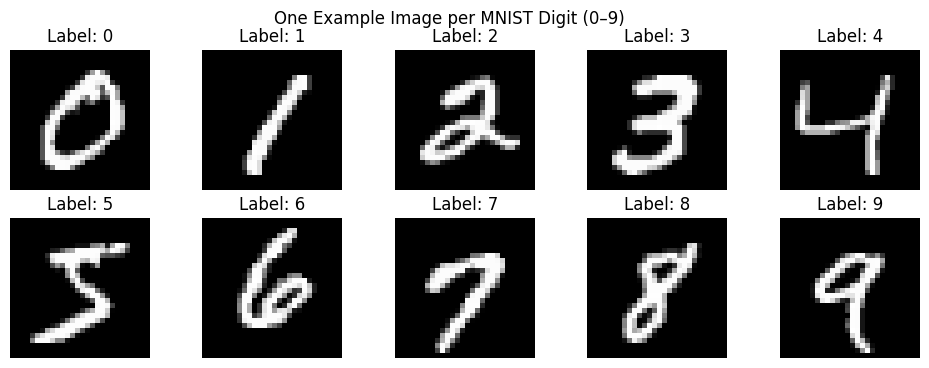

In [14]:
# Show one image per digit class (0–9)
plt.figure(figsize=(12, 4))
for digit in range(10):
    idx = np.where(y_train == digit)[0][0]
    plt.subplot(2, 5, digit + 1)
    plt.imshow(x_train[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {digit}")
    plt.axis('off')
plt.suptitle("One Example Image per MNIST Digit (0–9)")
plt.show()

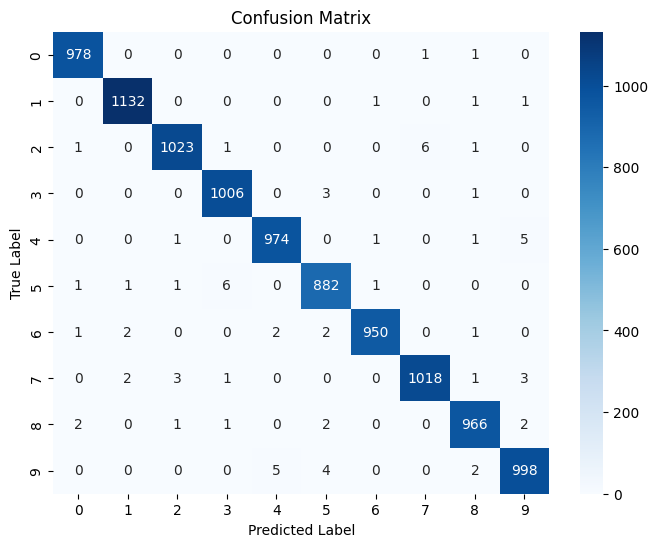

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 8: Use the already generated predictions (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Step 9: Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

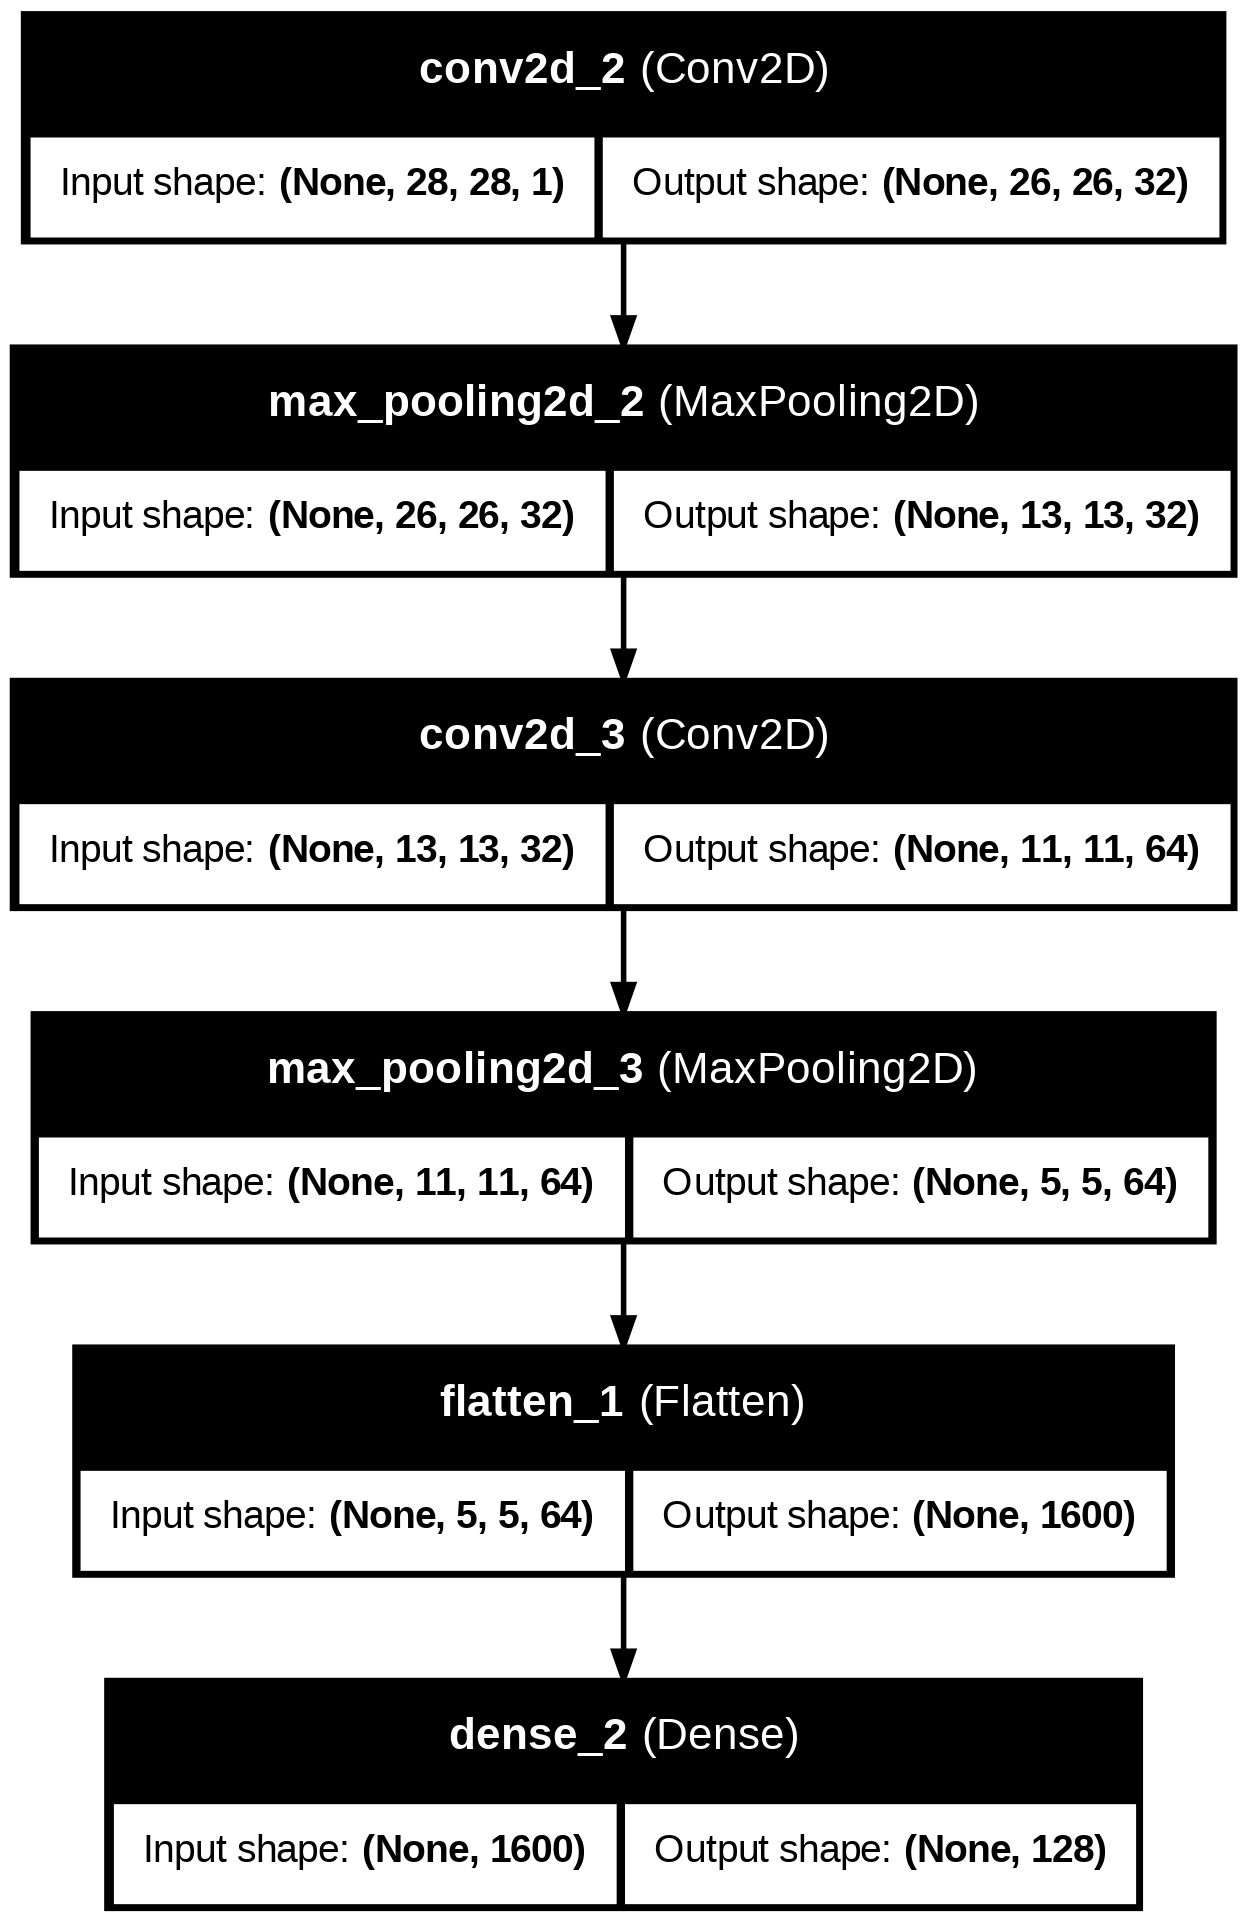

In [13]:
# Save and display the model architecture diagram
plot_model(cnn1, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Jupyter notebook or environment that supports images:
from IPython.display import Image
display(Image(filename='cnn_model.png'))